In Case of Parallel workflows we need to return the partial state not the entire state from each node otherwise Langgraph thinks of it as write conflict and gives error

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int
    strike_rate : float
    bpb : float
    boundary_percent : float
    summary : str

In [8]:
def calc_strike_rate(state: BatsmanState) -> BatsmanState:
    sr = (state['runs'] / state['balls']) * 100
    # return state
    return {'strike_rate': sr}

def calc_bpb(state: BatsmanState) -> BatsmanState:
    bpb = state['balls'] / (state['fours'] + state['sixes'])
    # return state
    return {'bpb' : bpb}


def calc_boundary_percent(state: BatsmanState) -> BatsmanState:
    bp = ((state['fours']*4 + state['sixes']*6) / state['runs'] ) * 100
    # return state 
    return {'boundary_percent' : bp}

def generate_summary(state: BatsmanState) -> BatsmanState:
    summary = f"""
                        Strike Rate: {state['strike_rate']}\n
                        Balls Per Boundary: {state['bpb']}\n
                        Boundary percent: {state['boundary_percent']}\n
                        """
    # return state
    return {'summary': summary}


In [9]:
graph = StateGraph(BatsmanState)

graph.add_node("calc_strike_rate", calc_strike_rate)
graph.add_node("calc_bpb", calc_bpb)
graph.add_node("calc_boundary_percent", calc_boundary_percent)
graph.add_node("summary", generate_summary)

graph.add_edge(START, "calc_strike_rate")
graph.add_edge(START, "calc_bpb")
graph.add_edge(START, "calc_boundary_percent")
graph.add_edge("calc_strike_rate", "summary")
graph.add_edge("calc_bpb", "summary")
graph.add_edge("calc_boundary_percent", "summary")
graph.add_edge("summary", END)

workflow = graph.compile()

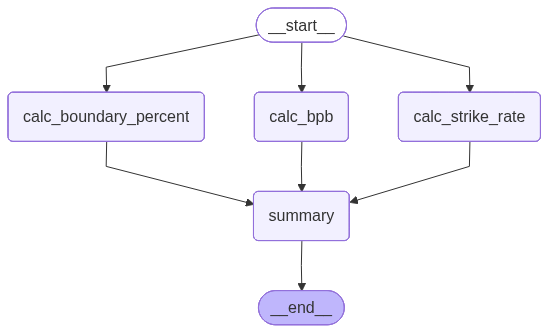

In [10]:
workflow

In [11]:
initial_state = {"runs" : 100, "balls" : 40, "fours" : 6, "sixes" : 5}
final_state = workflow.invoke(initial_state)

In [12]:
final_state

{'runs': 100,
 'balls': 40,
 'fours': 6,
 'sixes': 5,
 'strike_rate': 250.0,
 'bpb': 3.6363636363636362,
 'boundary_percent': 54.0,
 'summary': '\n                        Strike Rate: 250.0\n\n                        Balls Per Boundary: 3.6363636363636362\n\n                        Boundary percent: 54.0\n\n                        '}